In [96]:
# Import Liberaries that will be used

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [97]:
credit_DF = pd.read_csv('..\data\Marketing_data.csv')

In [98]:
credit_DF.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Cleaning:


- [ ] Find Duplicates
- [ ] Find Null Values and Process them.
- [ ] Remove non useful features

- [x] Find Duplicates:

In [99]:
 credit_DF.duplicated().sum()

np.int64(0)

- [X] Find Null Values and Process them.

<Axes: >

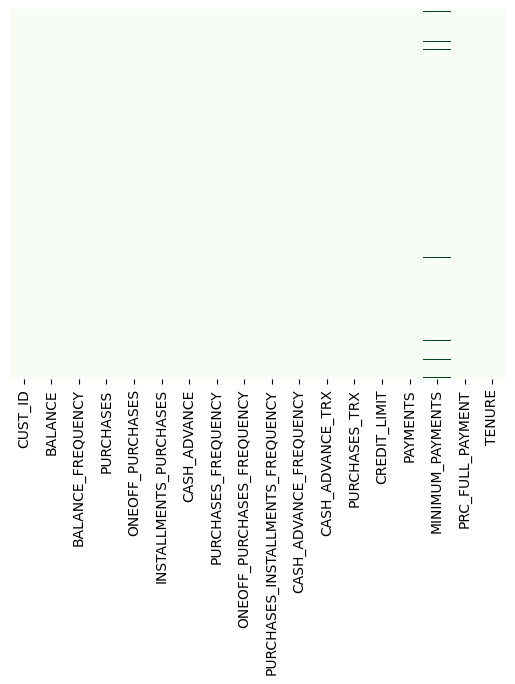

In [100]:
sns.heatmap(credit_DF.isnull(), yticklabels = False , cbar = False, cmap = 'Greens')

In [101]:
credit_DF.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [102]:
credit_DF['CREDIT_LIMIT'] = credit_DF['CREDIT_LIMIT'].fillna(credit_DF['CREDIT_LIMIT'].mean())
credit_DF['MINIMUM_PAYMENTS'] = credit_DF['MINIMUM_PAYMENTS'].fillna(credit_DF['MINIMUM_PAYMENTS'].mean())

In [103]:
credit_DF.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### EDA:

In [104]:
credit_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [105]:
credit_DF.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [106]:
# The Customer Who has made most purchases:
# Is customer with Id C10574
credit_DF[credit_DF['PURCHASES'] == credit_DF['PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [107]:
# The Customer Who has made most cash advance amount of money:
# Is customer with Id C12226
credit_DF[credit_DF['CASH_ADVANCE'] == credit_DF['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


- [X] Remove non useful features

In [108]:
credit_DF = credit_DF.drop('CUST_ID', axis = 1)
credit_DF

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Data Visulalization:

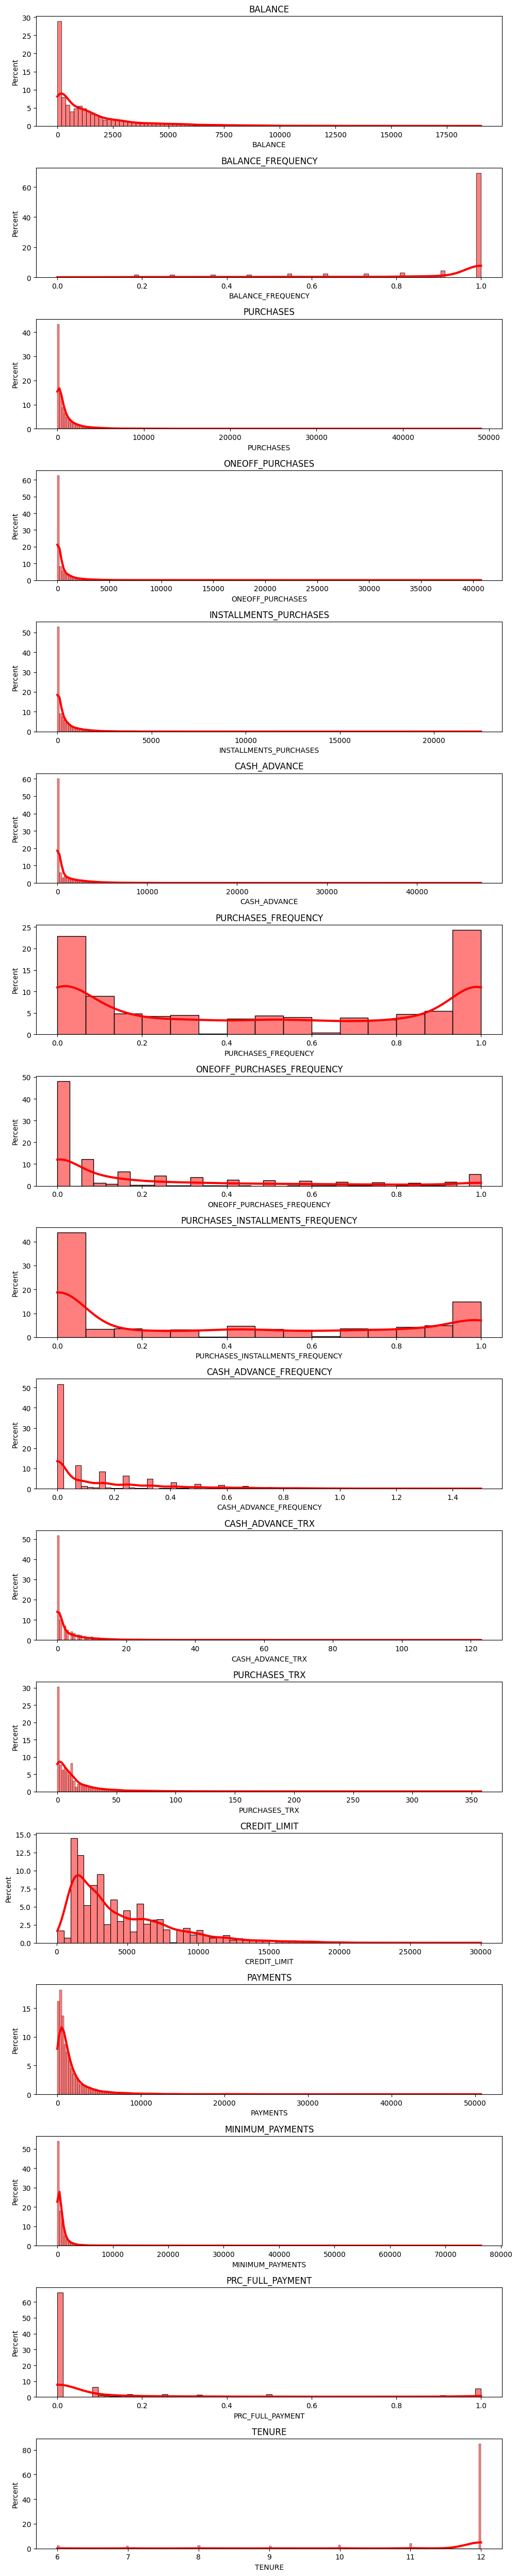

In [109]:
features = credit_DF.columns
features_no = len(features)

plt.figure(figsize = (10,50))

for digit in range(features_no):
    plt.subplot(features_no,1,digit+1)
    sns.histplot(
    data=credit_DF,
    x=features[digit],
    kde=True,
    stat='percent',
    color='r',  # Histogram color
    line_kws={'linewidth': 3},
    )  # KDE color and thickness) 
    plt.title(features[digit])

plt.tight_layout()
plt.show()

<Axes: >

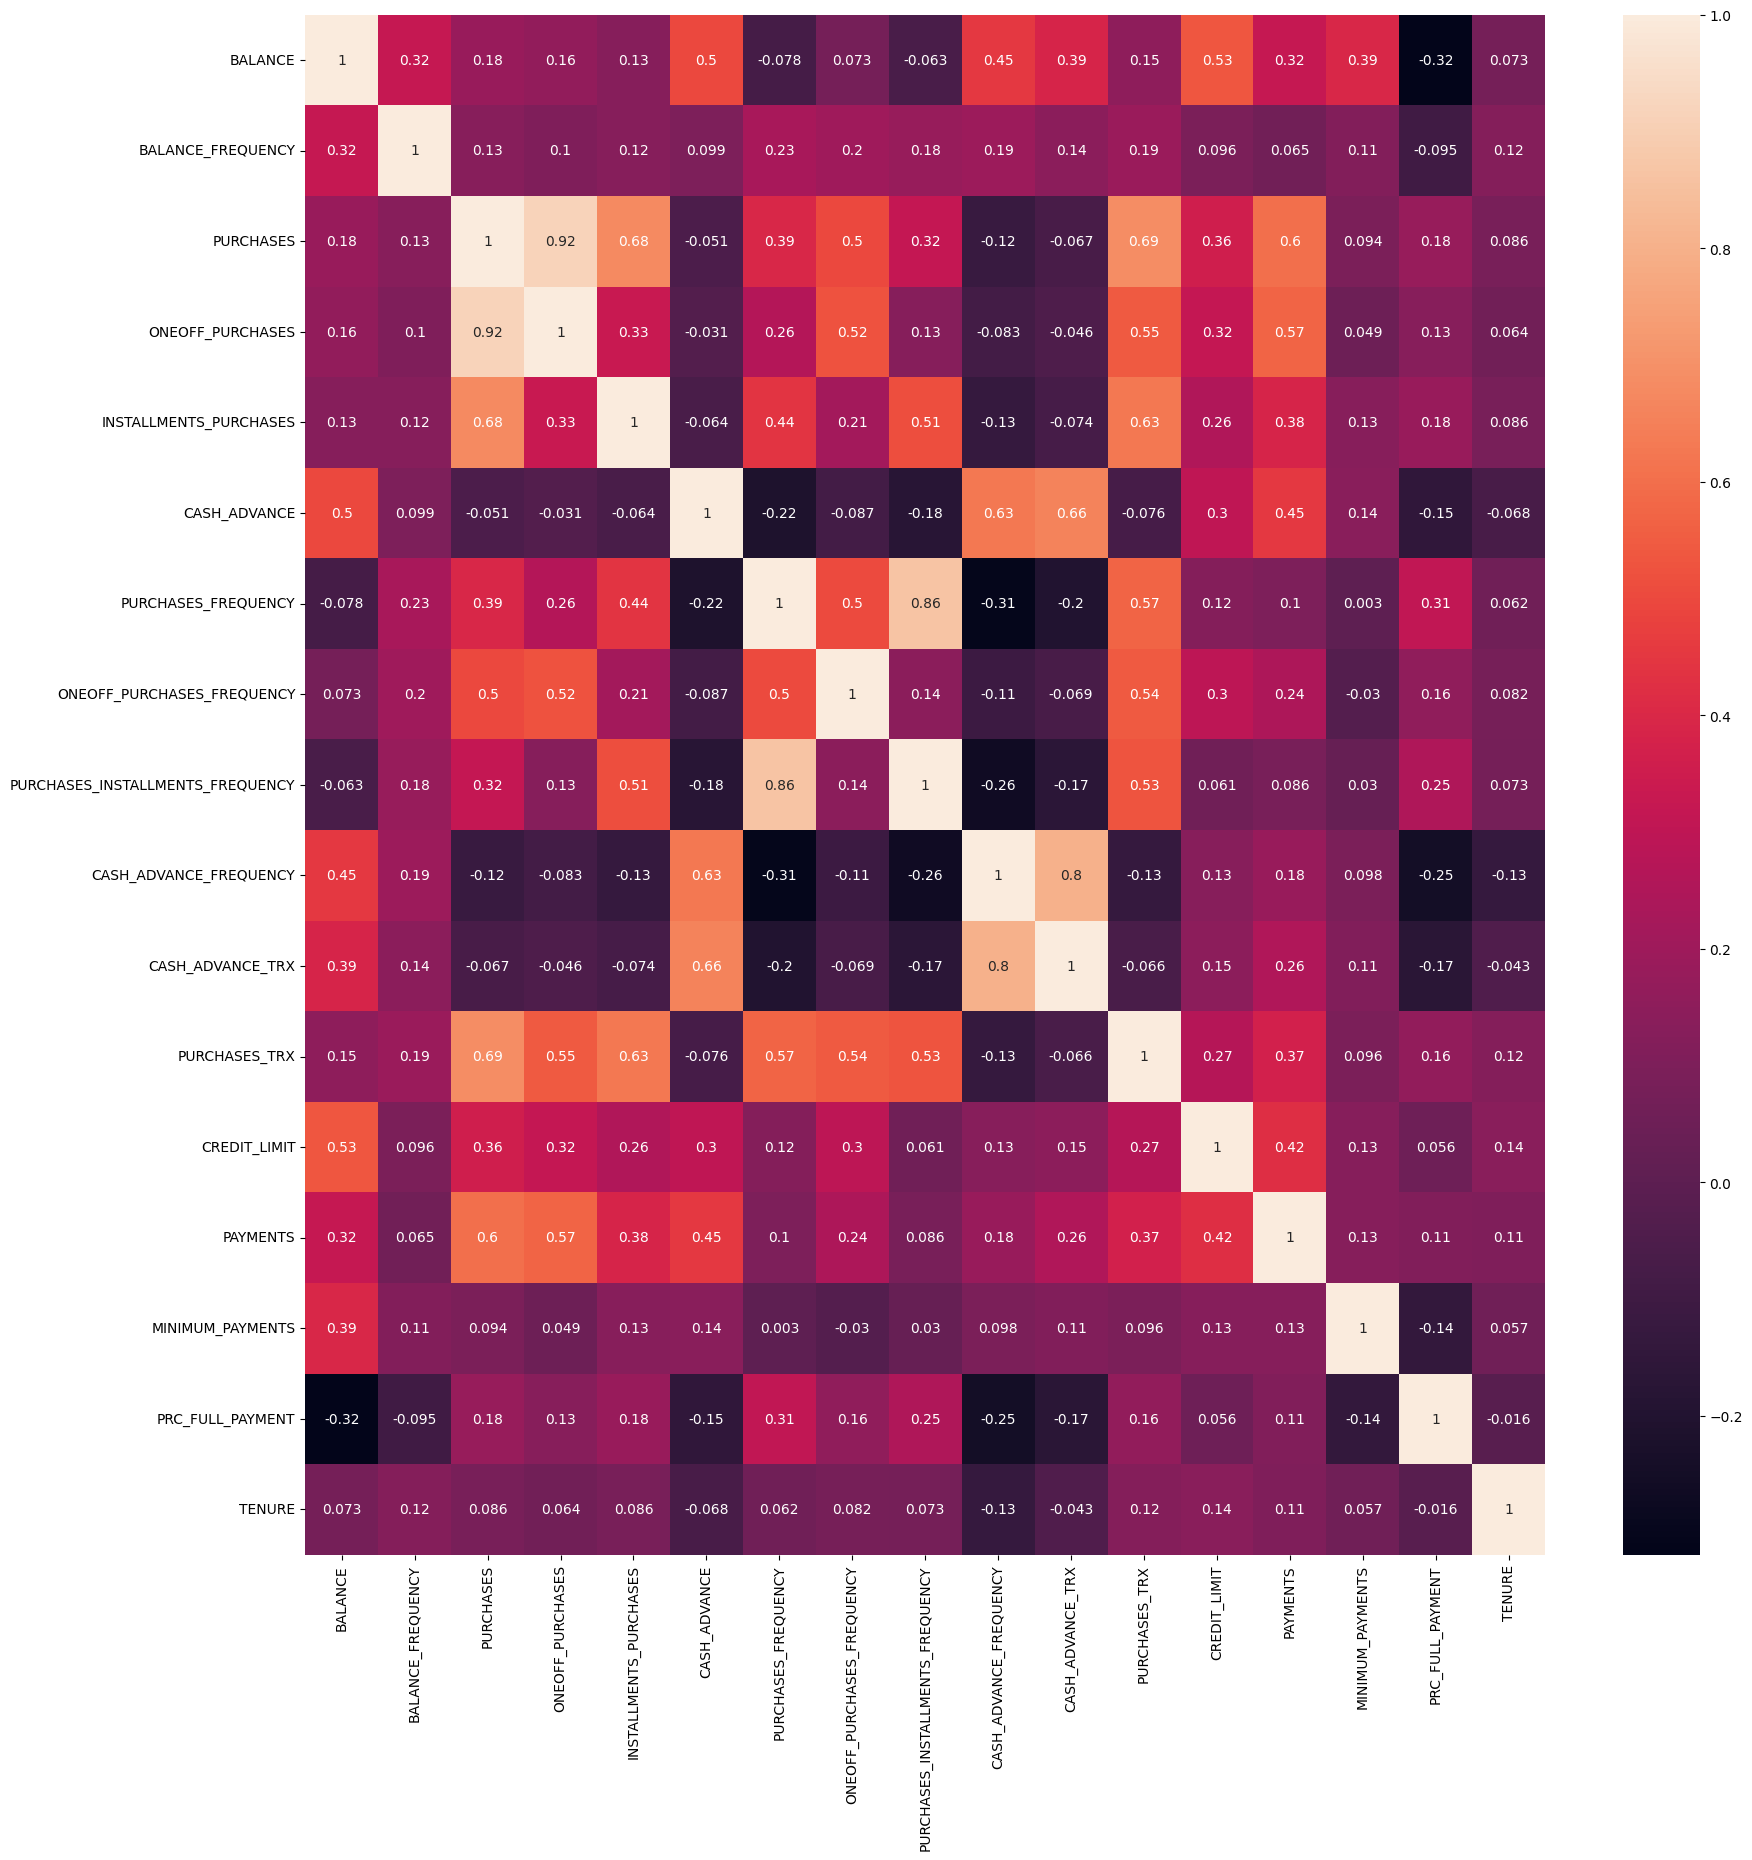

In [110]:
### See Correlations;
f , ax = plt.subplots(figsize =(20,20))
sns.heatmap(credit_DF.corr(), annot = True)

## Modeling:

##### Normalize data:

In [111]:
scaler = StandardScaler()

In [112]:
scaled_DF = scaler.fit_transform(credit_DF)

Finding optimal number of clusters "K":
   - Using "intertia_" fucntion, which is represent wcss
   - Using silhouette_score

**Intertia method:**

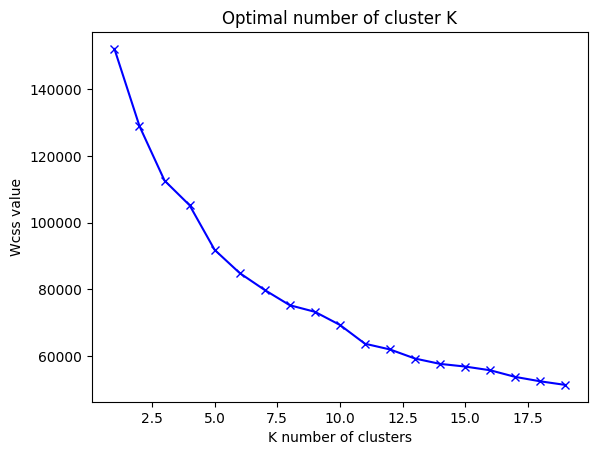

In [113]:
ranges = range(1,20)
score = []
for k in ranges:
    kmeans = KMeans(n_clusters = k)
    # model training:
    kmeans.fit(scaled_DF)
    wcss = kmeans.inertia_
    score.append(wcss)

plt.plot(ranges,score,'bx-')
plt.title("Optimal number of cluster K")
plt.xlabel('K number of clusters')
plt.ylabel('Wcss value')

plt.show()
    

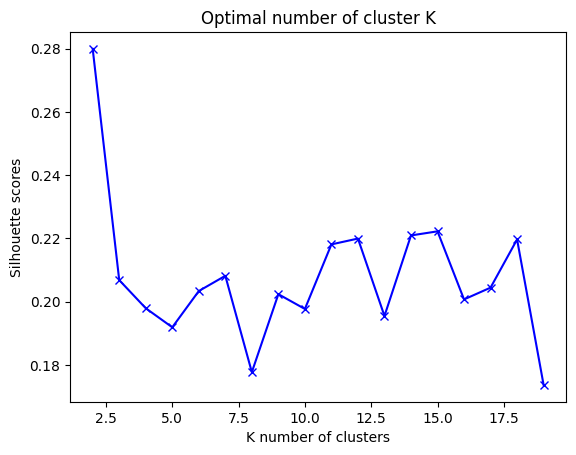

In [114]:
K_ranges = range(2,20)
silhouette_scores = []
for k in K_ranges:
    kmeans = KMeans(n_clusters = k)
    # model training:
    labels = kmeans.fit_predict(scaled_DF)
    silhouette = silhouette_score(scaled_DF,labels)
    silhouette_scores.append(silhouette)

    
plt.plot(K_ranges,silhouette_scores,'bx-')
plt.title("Optimal number of cluster K")
plt.xlabel('K number of clusters')
plt.ylabel('Silhouette scores')
plt.show()

In [115]:
best_k_elbow = 10  # visually inspect elbow plot
best_k_silhouette = K_ranges[np.argmax(silhouette_scores[1:])]

print(f"Best k by elbow (visual): {best_k_elbow}")
print(f"Best k by silhouette: {best_k_silhouette}")

Best k by elbow (visual): 10
Best k by silhouette: 14


- So  I will be goig with  **10 clusters**.

In [116]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(scaled_DF)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [117]:
labels = kmeans.labels_

In [118]:
labels_Df = pd.DataFrame(data = labels, columns = ['cluster'])
labels_Df.head()

,cluster
0,2
1,3
2,1
3,2
4,2


In [119]:

clustered_DF = pd.concat([credit_DF,labels_Df], axis = 1)
clustered_DF.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


#### Clusters Insights and Visualizations:

#### Clusters **Centers**:

In [120]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_Df = pd.DataFrame(data = centers, columns = credit_DF.columns)
centers_Df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,885.852016,0.791306,374.166953,241.116111,133.555892,1153.095915,0.390242,0.118074,0.256068,0.204135,3.370370,4.858586,2423.424999,591.640123,381.312338,0.129473,7.193603
1,1172.511734,0.971506,2057.340284,1680.166373,377.173911,259.353640,0.877707,0.794844,0.379472,0.049603,0.950355,28.260385,5929.358939,2032.904538,463.270950,0.272869,11.874367
2,1395.123611,0.970742,229.984053,187.799841,42.386204,659.996882,0.138396,0.083090,0.054926,0.138901,2.606122,2.494694,3155.108844,954.327219,695.811623,0.022092,11.884898
3,4682.430554,0.977227,398.404536,255.388286,143.118740,3668.232539,0.253185,0.117594,0.159546,0.460443,12.384073,6.027218,7489.571114,2479.090726,2147.812121,0.021744,11.668347
4,3530.425607,0.989072,5905.960995,3531.201194,2376.252338,594.108864,0.957801,0.683895,0.863295,0.077299,1.980100,86.154229,9019.776119,5374.013406,1923.262346,0.226453,11.962687
5,108.626336,0.349069,322.847550,203.418138,119.701706,329.224172,0.249110,0.068986,0.175047,0.033968,0.745872,3.997248,3843.270133,1160.910205,276.582151,0.189524,11.777982
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,95.386634,0.892541,941.766347,160.235759,781.658066,21.882792,0.845662,0.084014,0.782229,0.003920,0.065903,17.040115,3962.968872,1058.203987,184.962449,0.780172,11.647564
8,1141.934580,0.965433,946.738461,255.799468,691.448366,305.253652,0.872223,0.113971,0.822944,0.055691,1.107663,20.057631,3480.267846,1198.043582,1025.210385,0.052278,11.894237
9,5322.015100,0.943055,1094.255938,661.606719,432.649219,11041.994120,0.382115,0.196773,0.283810,0.632708,30.882812,13.960938,9610.546875,12069.668629,2255.810279,0.115229,11.546875


#### Histogram visualizations:

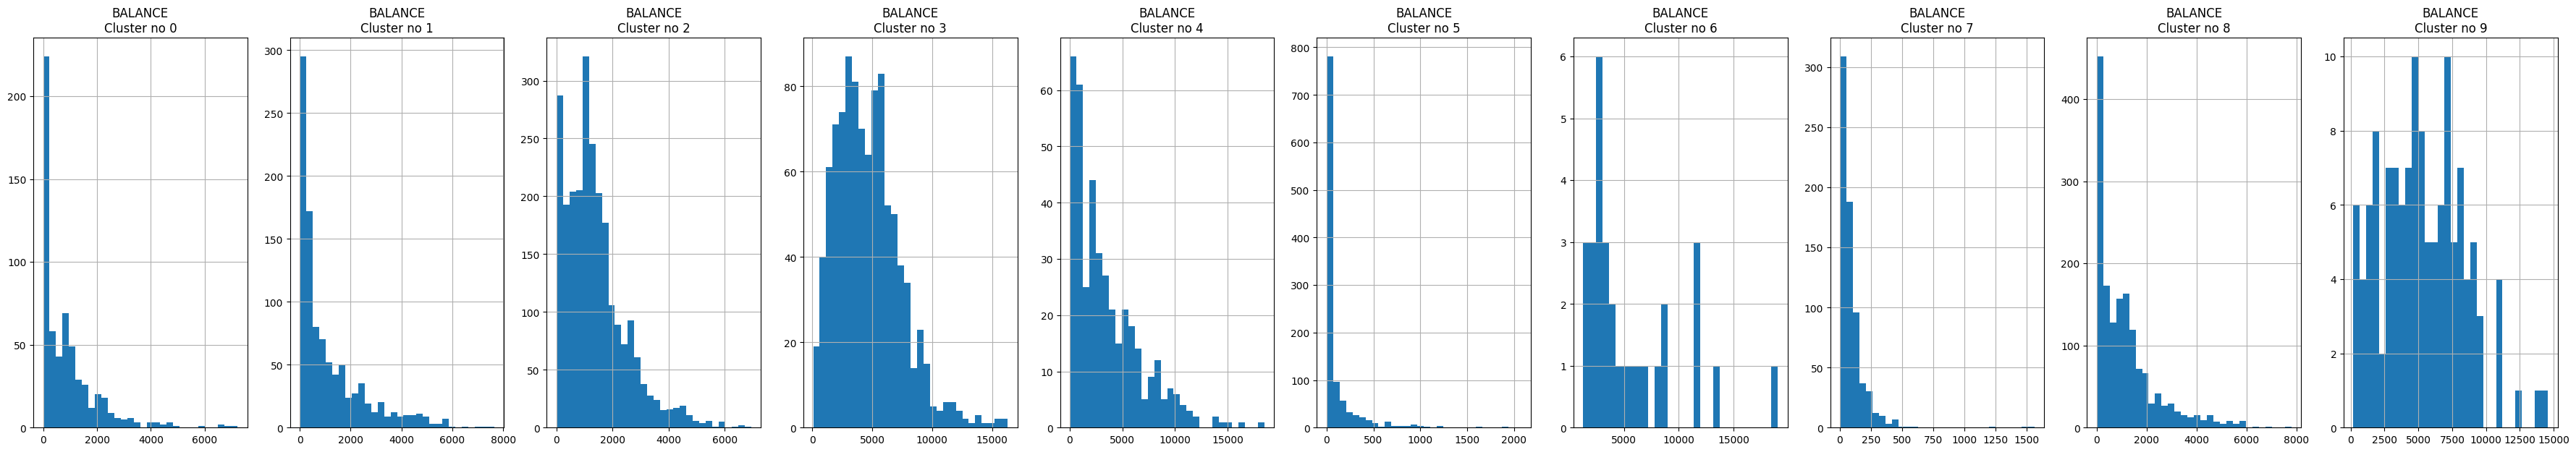

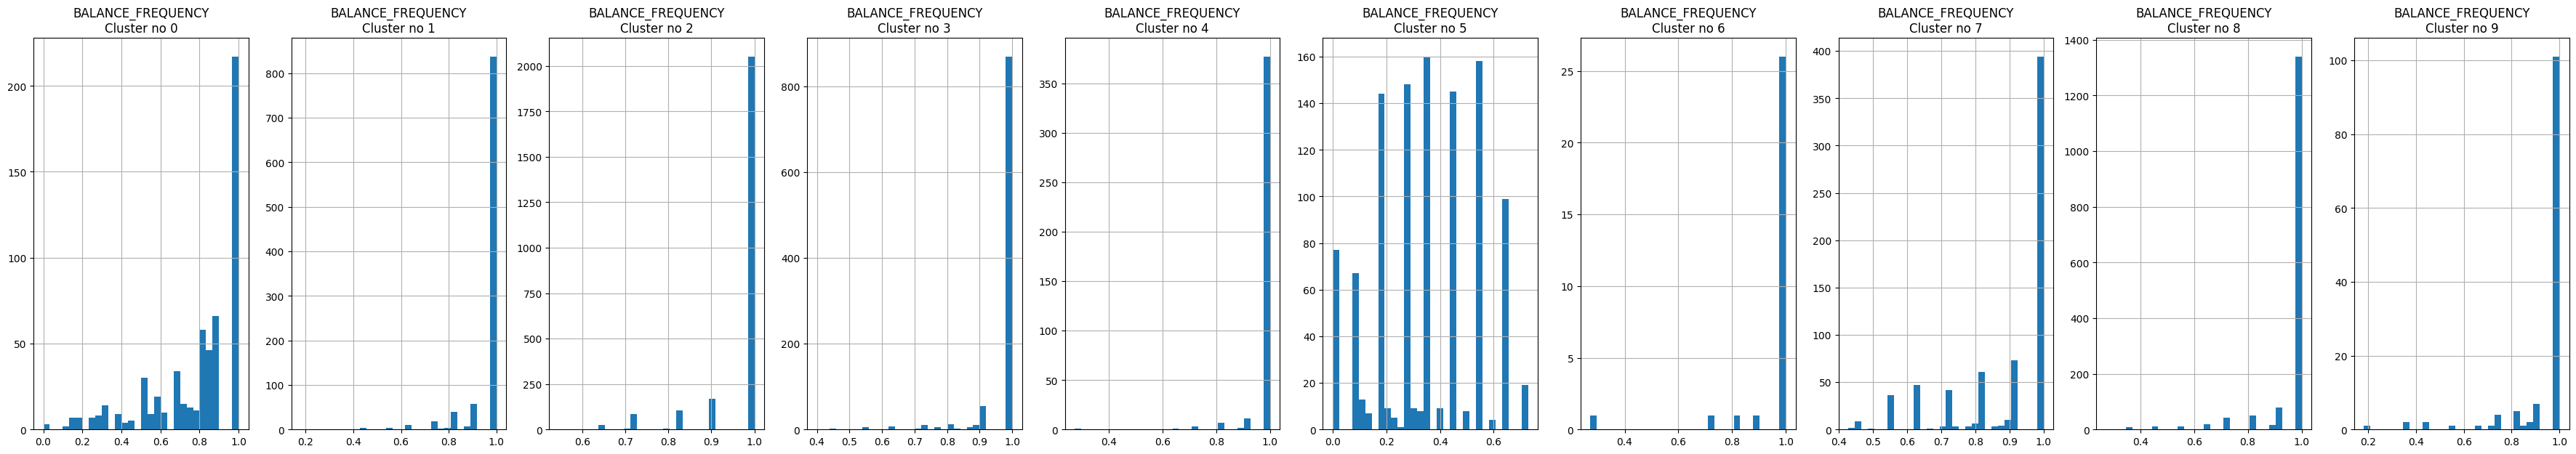

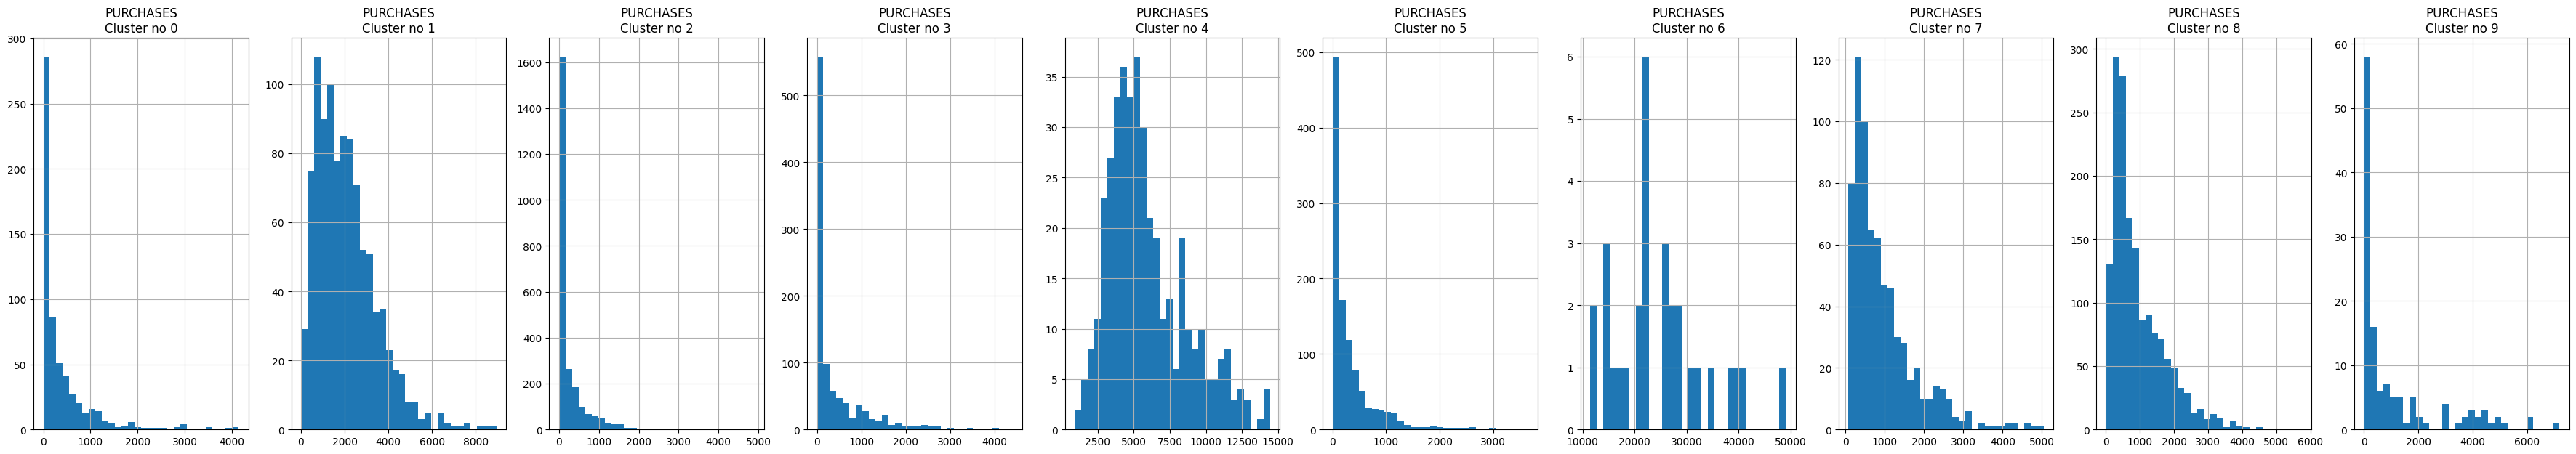

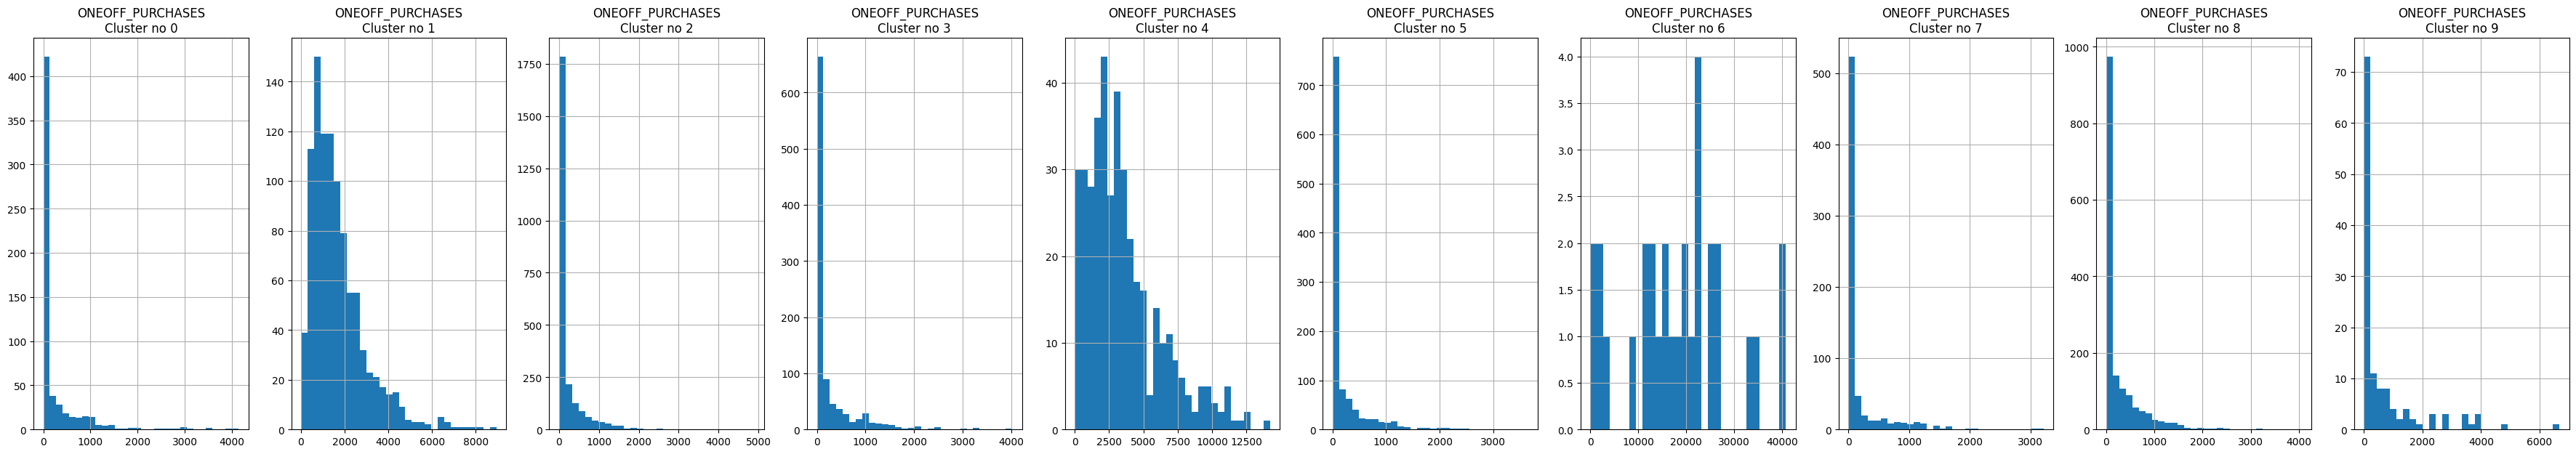

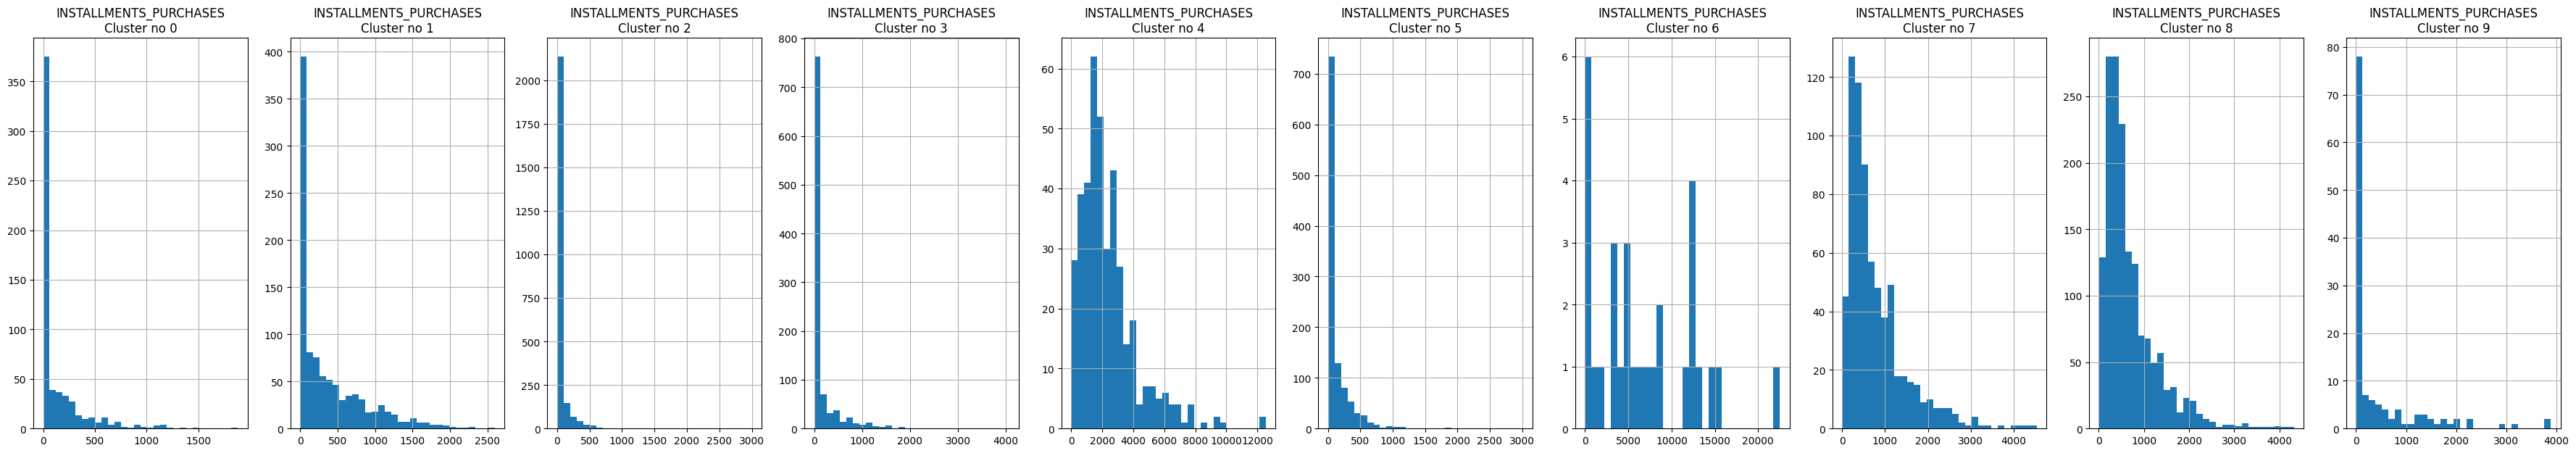

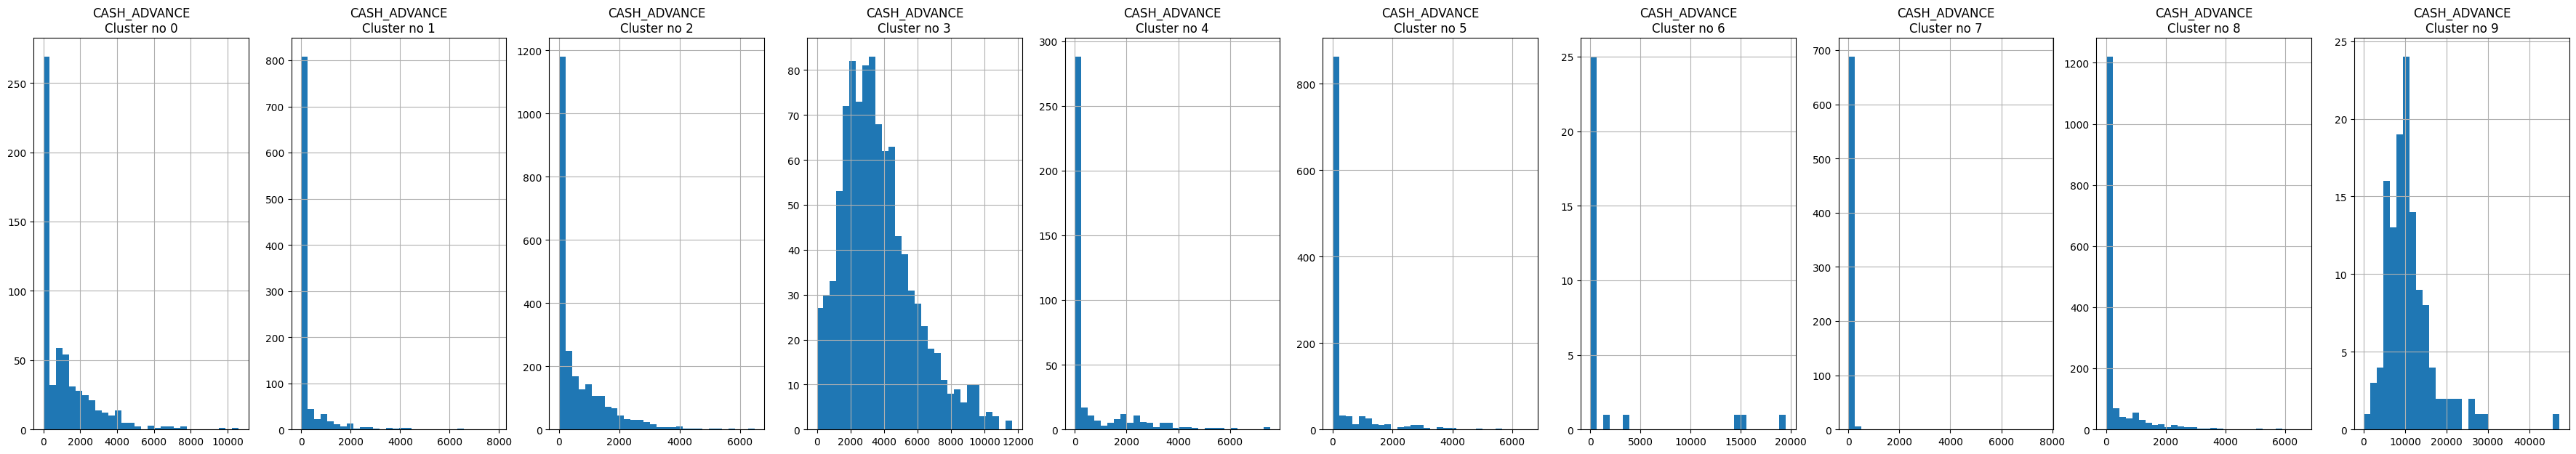

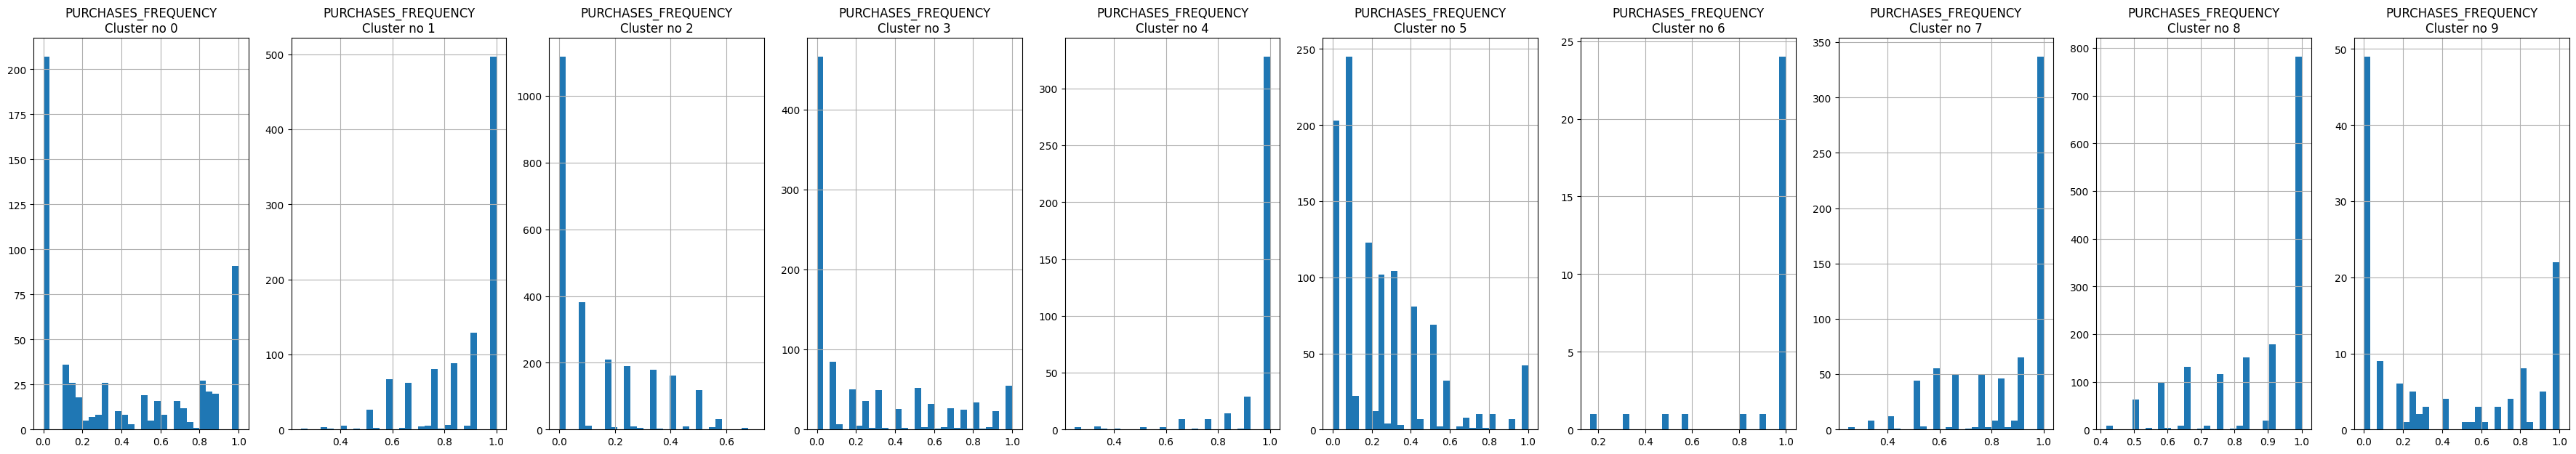

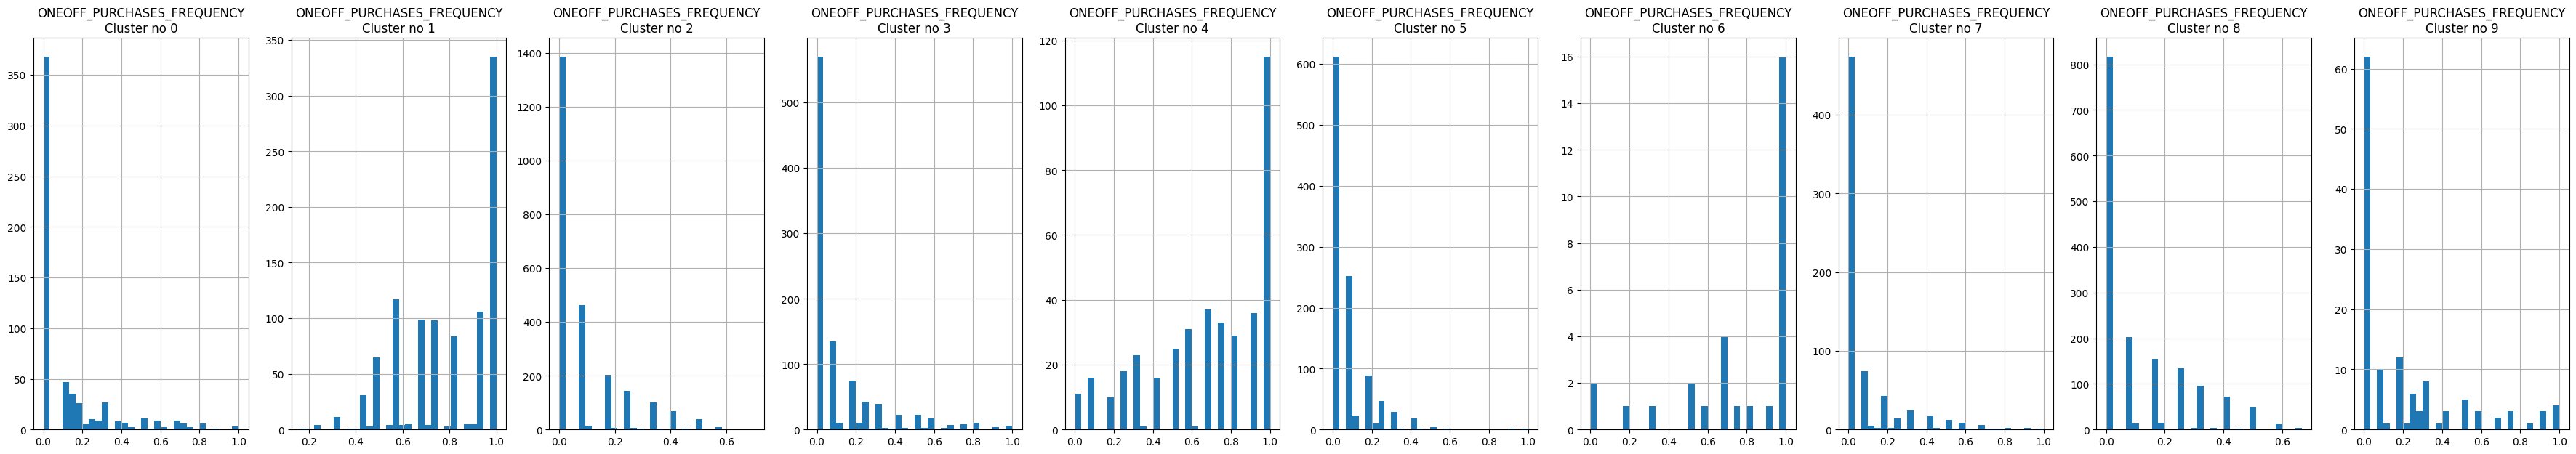

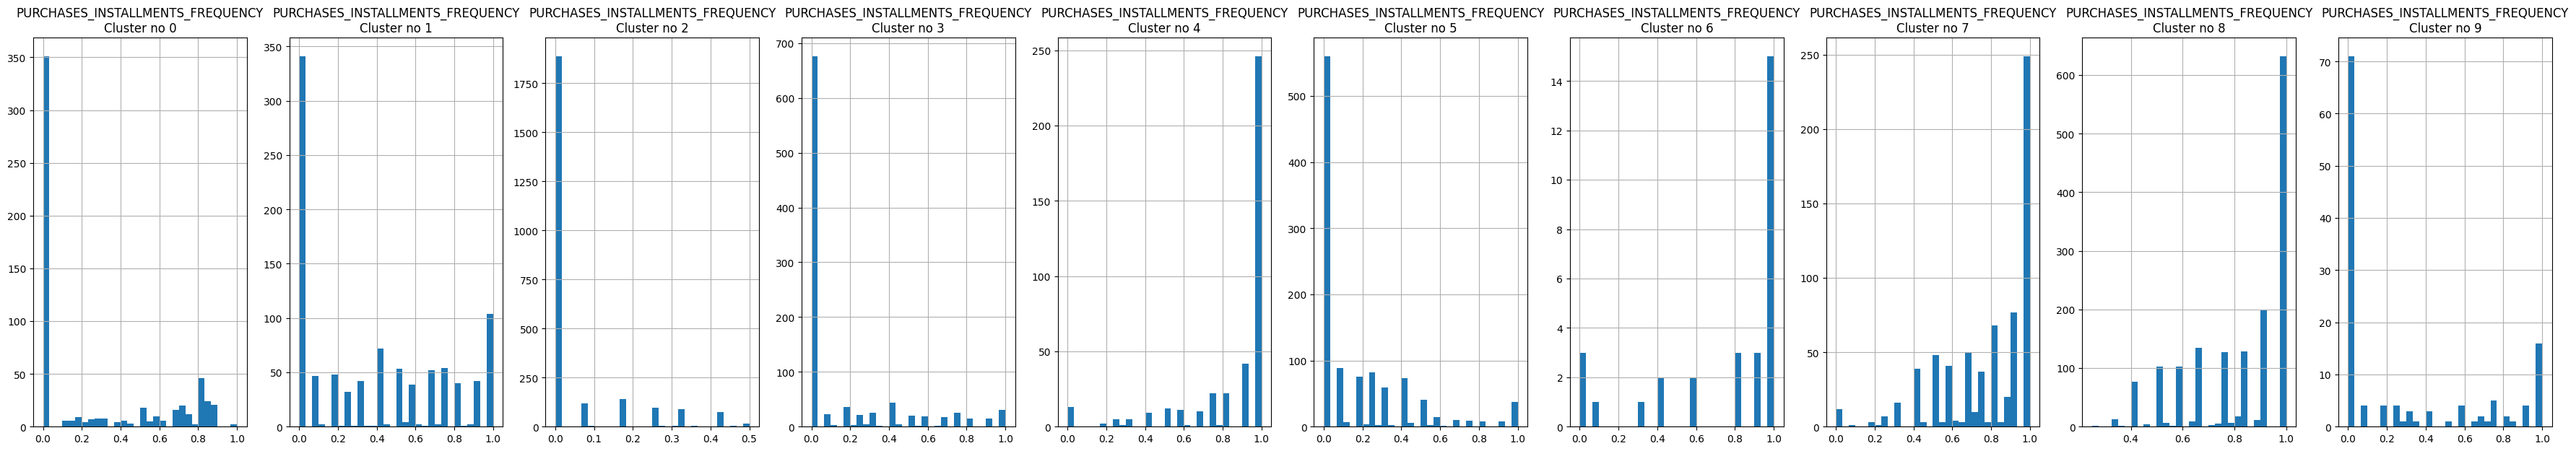

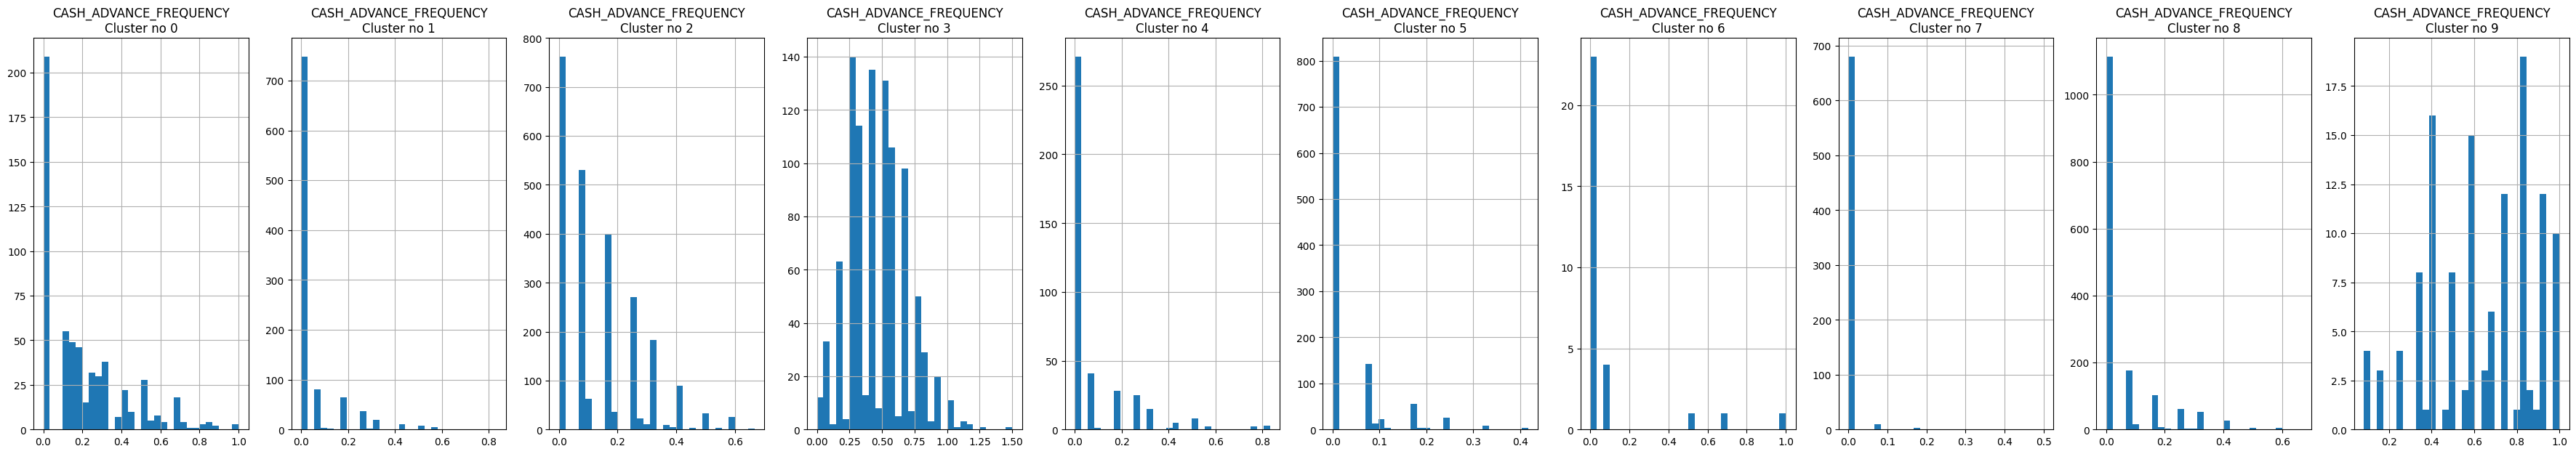

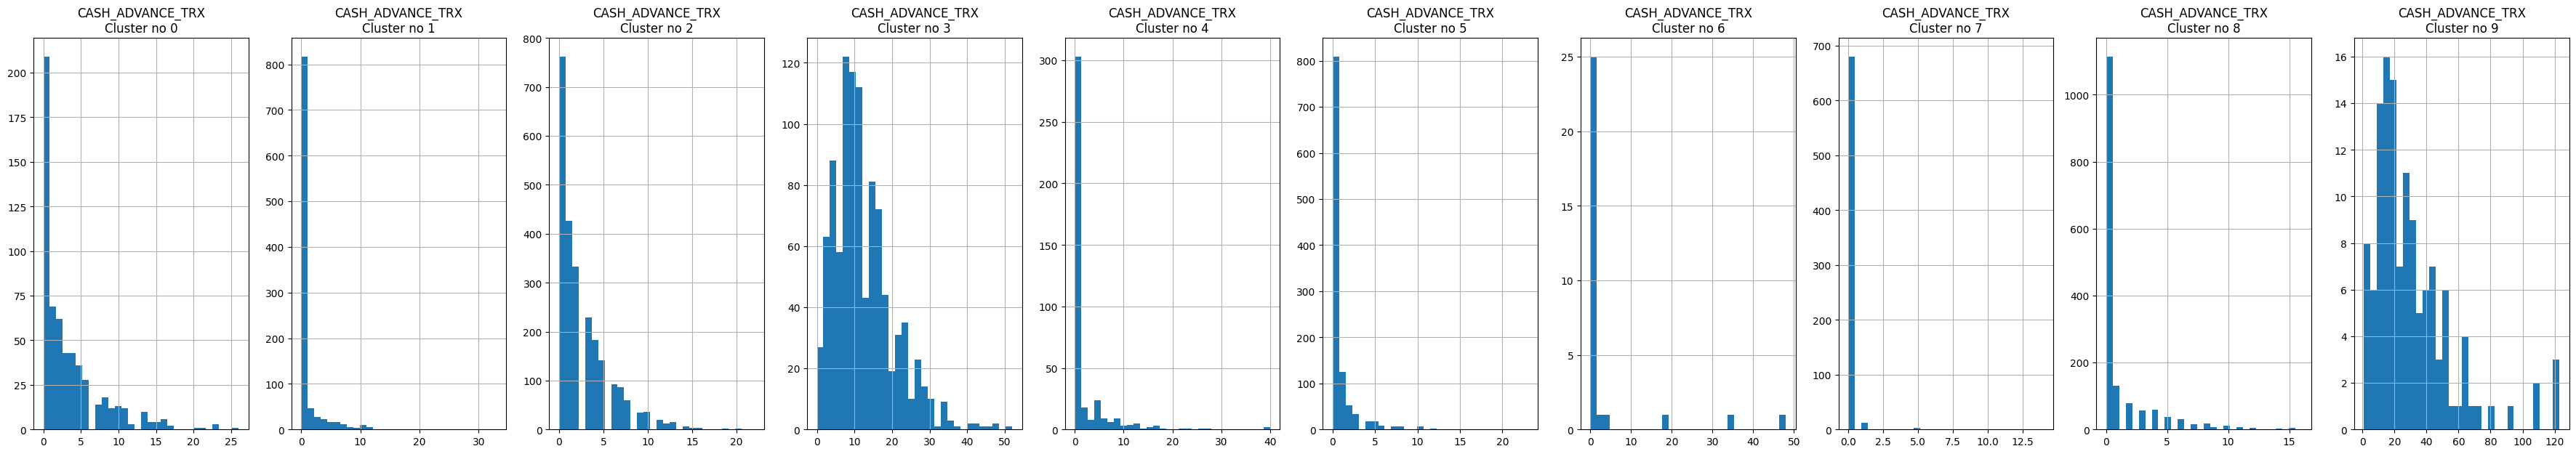

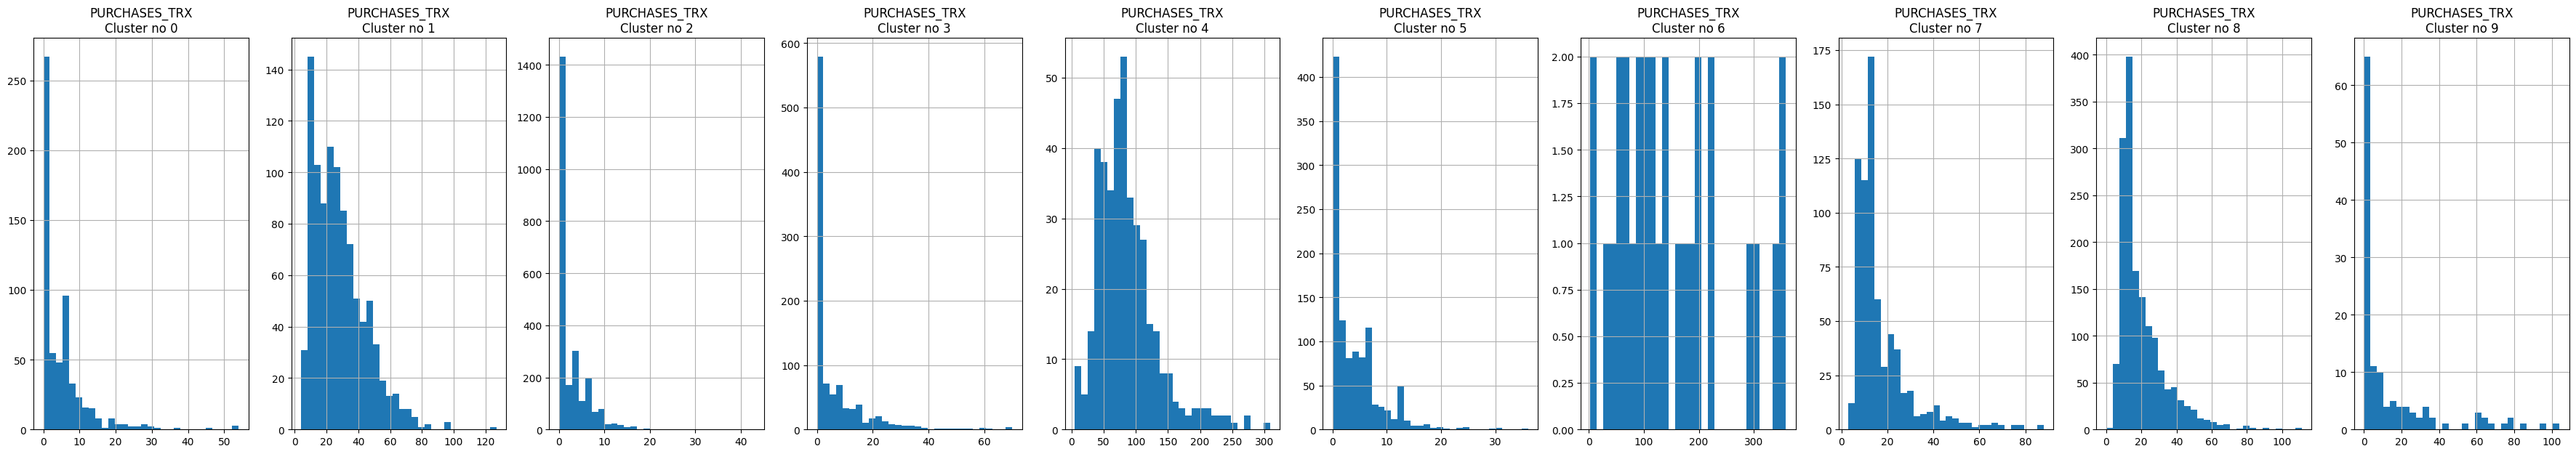

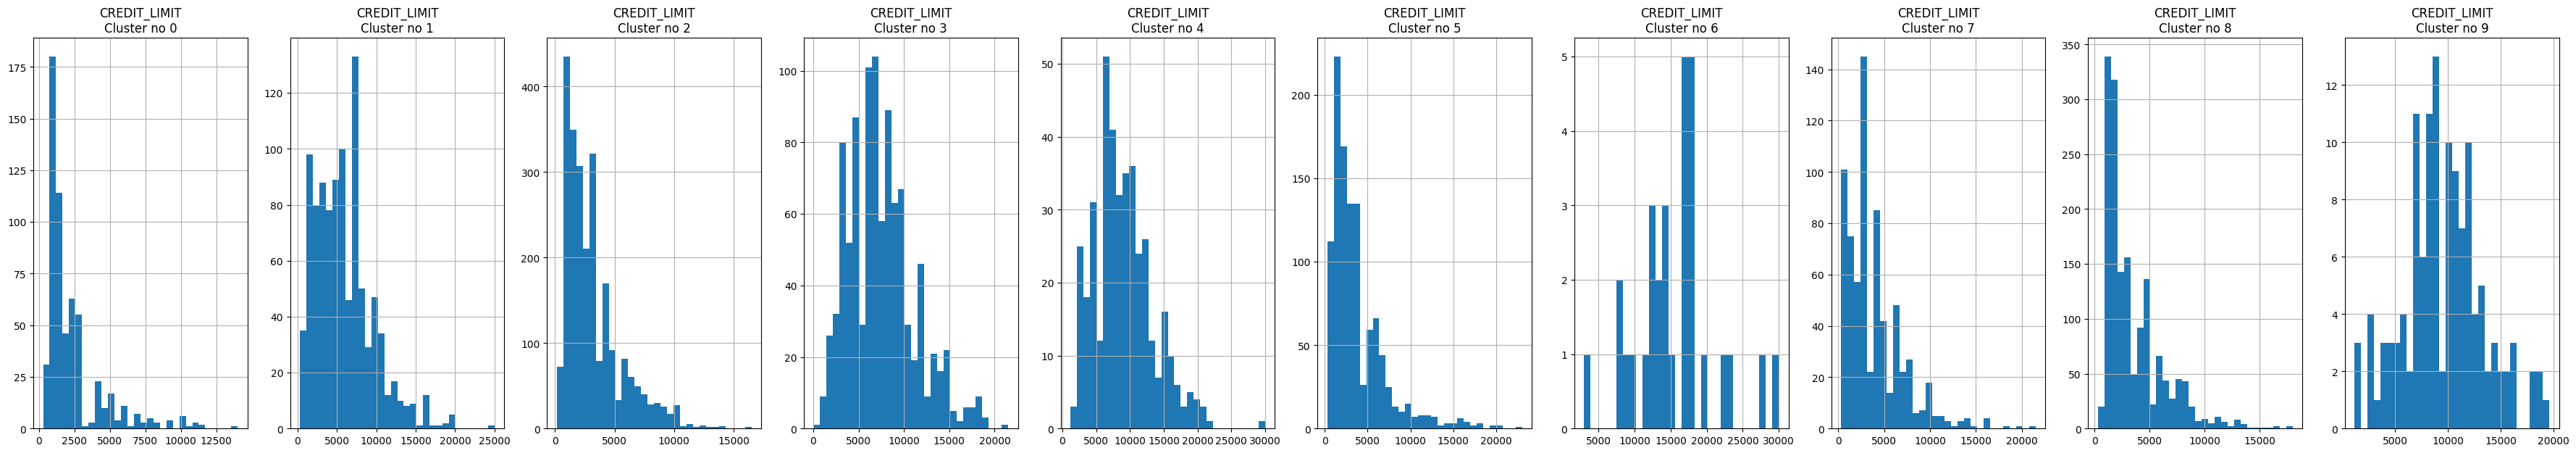

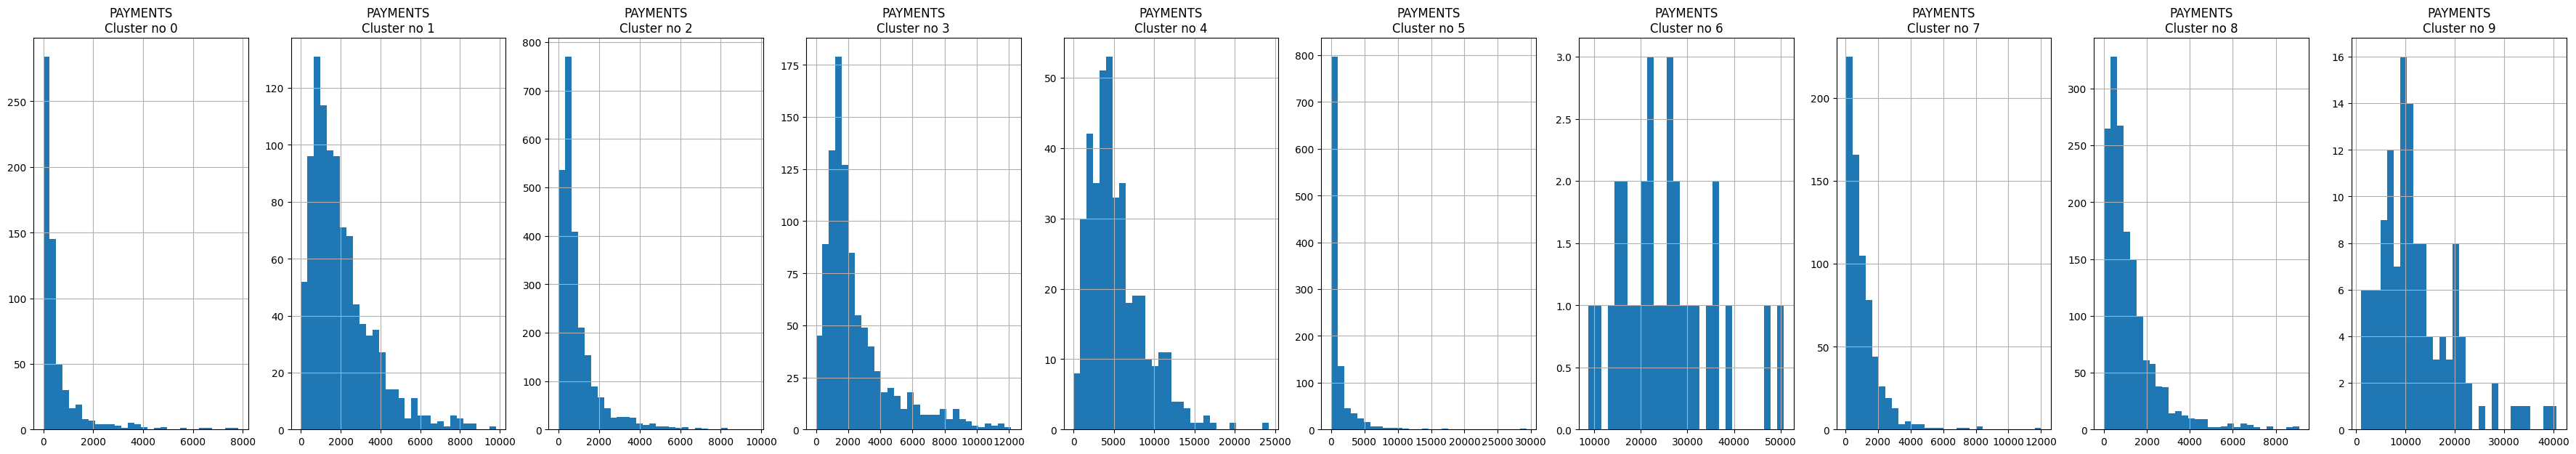

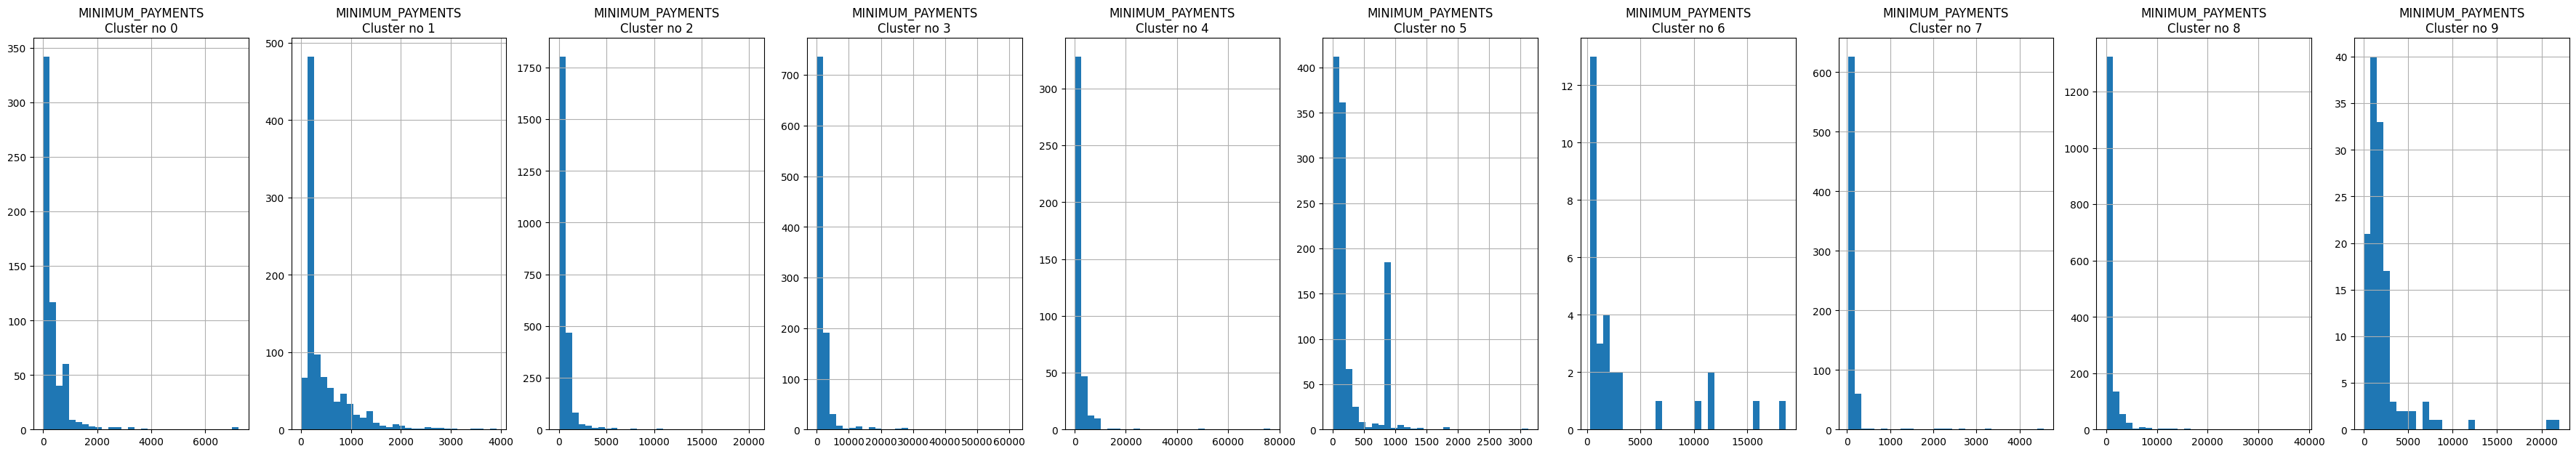

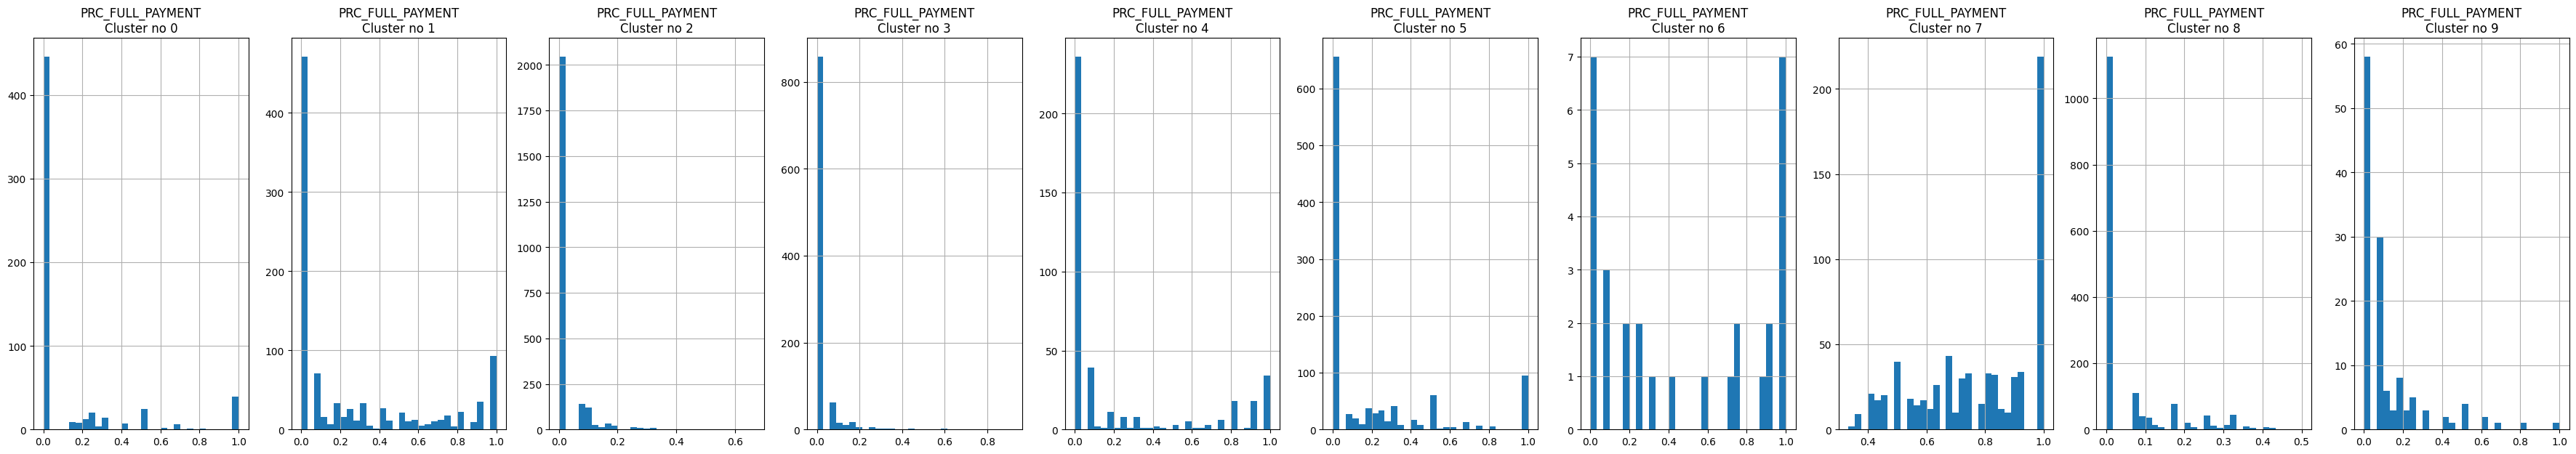

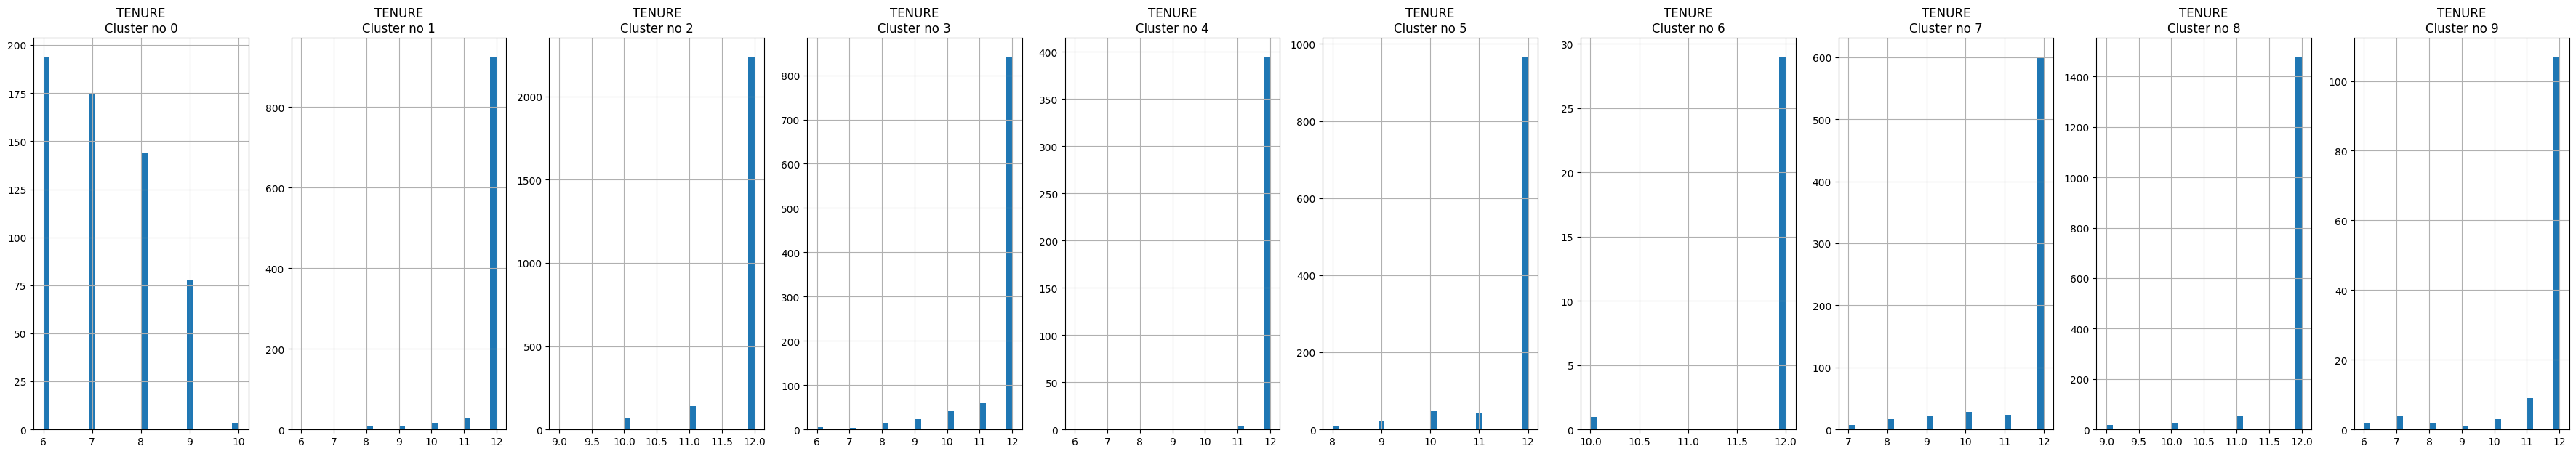

In [121]:
features = credit_DF.columns

for feature in features:
    plt.figure(figsize= (45,7))
    
    clusters_number = 10
    for number in range(clusters_number):

        plt.subplot(1,clusters_number,number+1)
        
        cluster = clustered_DF[clustered_DF['cluster']==number]
        
        cluster[feature].hist(bins=30)
        plt.title(f'{feature}\nCluster no {number}')
        
plt.show()

#### Data Preparetion for Deployment:
Using **Pickle**

In [123]:
import pickle

In [124]:
### feature names:
features_names = credit_DF.columns.to_list()
features_names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [127]:
with open('../model/features_names.pkl','wb') as f:
    pickle.dump(features_names,f)

In [128]:
# Salar:
with open('../model/scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [129]:
# kmeans model:
with open('../model/models.pkl','wb') as f:
    pickle.dump(kmeans,f)